# Ramen Ratings 2009 - 2020

Curious about the popularity of cup noodles around the world, determine what is the most & least purchased instant ramen varieties and brands.

## Import Library and Initialize Global Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from scipy import stats

import math
import wordcloud

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

SEED = 42

## Load CSV data

In [2]:
df = pd.read_csv('Ramen_ratings_2020.csv')

df.head()

,ID,URL,Brand,Variety,Style,Country,Stars
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5


## Data Preprocessing

### Rename features

In [3]:
# Rename attributes
df.rename(columns=str.lower, inplace=True)
df.rename(columns= {'id': 'id_old'}, inplace=True)

df

,id_old,url,brand,variety,style,country,stars
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5
...,...,...,...,...,...,...,...
3468,5,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3469,4,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3470,3,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3471,2,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


### Extract date

In [4]:
# Extract date from 'URL'
df['date']= df['url'].str.extract(r'(\d{4}/\d{2}/\d{2})')
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")

df

,id_old,url,brand,variety,style,country,stars,date
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5,2020-04-05
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5,2020-04-05
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75,2020-04-05
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5,2020-04-04
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5,2020-04-03
...,...,...,...,...,...,...,...,...
3468,5,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,2009-06-22
3469,4,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,2009-06-22
3470,3,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,2009-06-22
3471,2,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,2009-06-22


In [5]:
# Extract year & month from date
# get year
df['year'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.year
#df['year'] = pd.DatetimeIndex(df['date']).year
 
# get month
#df['month'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.month
df['month'] = pd.DatetimeIndex(df['date']).month

df

,id_old,url,brand,variety,style,country,stars,date,year,month
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5,2020-04-05,2020,4
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5,2020-04-05,2020,4
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75,2020-04-05,2020,4
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5,2020-04-04,2020,4
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5,2020-04-03,2020,4
...,...,...,...,...,...,...,...,...,...,...
3468,5,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,2009-06-22,2009,6
3469,4,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,2009-06-22,2009,6
3470,3,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,2009-06-22,2009,6
3471,2,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,2009-06-22,2009,6


In [6]:
"""
import re, datetime

match = []
regex = re.findall('\d{4}/\d{2}/\d{2}', str(df['url']))
for i in range(len(df['url'])) :
    match.append(regex)

df_date = pd.DataFrame([y for x in match for y in x])
df['date'] = df_date

df['date'] = pd.to_datetime(df['date'])

#match = re.search('\d{4}/\d{2}/\d{2}', str(df['url']))
#df['date'] = datetime.datetime.strptime(match.group(), '%Y/%m/%d').date()

df
"""

"\nimport re, datetime\n\nmatch = []\nregex = re.findall('\\d{4}/\\d{2}/\\d{2}', str(df['url']))\nfor i in range(len(df['url'])) :\n    match.append(regex)\n\ndf_date = pd.DataFrame([y for x in match for y in x])\ndf['date'] = df_date\n\ndf['date'] = pd.to_datetime(df['date'])\n\n#match = re.search('\\d{4}/\\d{2}/\\d{2}', str(df['url']))\n#df['date'] = datetime.datetime.strptime(match.group(), '%Y/%m/%d').date()\n\ndf\n"

### Fix corrupted ID

In [7]:
# Find duplicated IDs
duplicates = df[df['id_old'].duplicated()]

duplicates

,id_old,url,brand,variety,style,country,stars,date,year,month
730,2743,https://www.theramenrater.com/2018/03/01/2743-...,Nongshim,Nongshim Korean Clay Pot Ramyun,Bowl,China,3.5,2018-03-01,2018,3
1800,1673,https://www.theramenrater.com/2015/05/18/1673-...,Lishan Food Manufacturing,Black Cock Brand Vegetarian Chicken Noodle,Pack,Taiwan,3.5,2015-05-18,2015,5


In [8]:
# Locate IDs "1673", "1674", "2743" & "2744"
locator = df.loc[(df['id_old'] == "1673") |
                 (df['id_old'] == "1674") |
                 (df['id_old'] == "2743") |
                 (df['id_old'] == "2744")]
locator

,id_old,url,brand,variety,style,country,stars,date,year,month
728,2744,https://www.theramenrater.com/2018/03/02/2745-...,Nissin,U. F. O. BIG Wasabi-Mayo Yakisoba,Tray,Japan,5,2018-03-02,2018,3
729,2743,https://www.theramenrater.com/2018/03/01/2744-...,Myojo,Charumera Non-Fried Tonkotsu Ramen,Pack,Japan,5,2018-03-01,2018,3
730,2743,https://www.theramenrater.com/2018/03/01/2743-...,Nongshim,Nongshim Korean Clay Pot Ramyun,Bowl,China,3.5,2018-03-01,2018,3
1798,1674,https://www.theramenrater.com/2015/05/22/1675-...,Baixiang Noodles,Sauerkraut Flavor,Pack,China,4.5,2015-05-22,2015,5
1799,1673,https://www.theramenrater.com/2015/05/19/1674-...,Emart,Dare You! Habanero Ramen (New Edition),Cup,South Korea,3.5,2015-05-19,2015,5
1800,1673,https://www.theramenrater.com/2015/05/18/1673-...,Lishan Food Manufacturing,Black Cock Brand Vegetarian Chicken Noodle,Pack,Taiwan,3.5,2015-05-18,2015,5


In [9]:
# Extract new ID from 'URL'
df['id']= df['url'].str.extract(r'(\d{2}/\d{4})')
df['id'] = df['id'].str.split("/", expand=True)[1] # add index of the sliced sentence to extract 2nd word

df['id'] = df['id'].fillna(df['id_old'])

df

,id_old,url,brand,variety,style,country,stars,date,year,month,id
0,3473,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5,2020-04-05,2020,4,3473
1,3472,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5,2020-04-05,2020,4,3472
2,3471,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75,2020-04-05,2020,4,3471
3,3470,https://www.theramenrater.com/2020/04/04/3470-...,Myojo,Ippeichan Rich & Sweet Yakisoba,Tray,Japan,5,2020-04-04,2020,4,3470
4,3469,https://www.theramenrater.com/2020/04/03/3469-...,Mykuali,Penang Hokkien Prawn Rice Vermicelli Soup,Bowl,Malaysia,5,2020-04-03,2020,4,3469
...,...,...,...,...,...,...,...,...,...,...,...
3468,5,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,2009-06-22,2009,6,5
3469,4,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,2009-06-22,2009,6,4
3470,3,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,2009-06-22,2009,6,3
3471,2,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,2009-06-22,2009,6,2


### Rearrange features

In [10]:
# Rearrange columns
df = df[['id_old', 'id', 'date', 'month', 'year', 'url', 'brand','variety', 'style', 'country', 'stars']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id_old   3473 non-null   object        
 1   id       3473 non-null   object        
 2   date     3473 non-null   datetime64[ns]
 3   month    3473 non-null   int64         
 4   year     3473 non-null   int64         
 5   url      3473 non-null   object        
 6   brand    3473 non-null   object        
 7   variety  3473 non-null   object        
 8   style    3473 non-null   object        
 9   country  3473 non-null   object        
 10  stars    3473 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 298.6+ KB


In [11]:
# Change datatype
df['id'] = df['id'].apply(pd.to_numeric)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id_old   3473 non-null   object        
 1   id       3473 non-null   int64         
 2   date     3473 non-null   datetime64[ns]
 3   month    3473 non-null   int64         
 4   year     3473 non-null   int64         
 5   url      3473 non-null   object        
 6   brand    3473 non-null   object        
 7   variety  3473 non-null   object        
 8   style    3473 non-null   object        
 9   country  3473 non-null   object        
 10  stars    3473 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 298.6+ KB


In [12]:
# Sort by date
df.sort_values(by=['id'], ascending=True, inplace = True)

df

,id_old,id,date,month,year,url,brand,variety,style,country,stars
3472,1,1,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0.5
3471,2,2,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2
3470,3,3,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3469,4,4,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3468,5,5,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
...,...,...,...,...,...,...,...,...,...,...,...
2,3471,3471,2020-04-05,4,2020,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75
1,3472,3472,2020-04-05,4,2020,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
0,3473,3473,2020-04-05,4,2020,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
168,3305,3505,2019-10-07,10,2019,https://www.theramenrater.com/2019/10/07/3505-...,Sapporo Ichiban,Cupstar Classic Shoyu Ramen,Cup,Japan,3.25


In [13]:
# Validate & Locate IDs "1673", "1674", "2743" & "2744"
locator = df.loc[(df['id'] == 1673) |
                 (df['id'] == 1674) |
                 (df['id'] == 2743) |
                 (df['id'] == 2744) |
                 (df['id'] == 3676)]
locator

,id_old,id,date,month,year,url,brand,variety,style,country,stars
1800,1673,1673,2015-05-18,5,2015,https://www.theramenrater.com/2015/05/18/1673-...,Lishan Food Manufacturing,Black Cock Brand Vegetarian Chicken Noodle,Pack,Taiwan,3.5
1799,1673,1674,2015-05-19,5,2015,https://www.theramenrater.com/2015/05/19/1674-...,Emart,Dare You! Habanero Ramen (New Edition),Cup,South Korea,3.5
730,2743,2743,2018-03-01,3,2018,https://www.theramenrater.com/2018/03/01/2743-...,Nongshim,Nongshim Korean Clay Pot Ramyun,Bowl,China,3.5
729,2743,2744,2018-03-01,3,2018,https://www.theramenrater.com/2018/03/01/2744-...,Myojo,Charumera Non-Fried Tonkotsu Ramen,Pack,Japan,5
1604,1869,3676,2015-12-19,12,2015,https://www.theramenrater.com/2015/12/19/36761/,Nissin,Soba Fried Noodles Chili,Pack,Germany,3.5


### Fix duplicated IDs

In [14]:
# Find all duplicated IDs
duplicates = df[df['id'].duplicated(keep=False)]

print('Duplicates : {}'.format(len(duplicates)))
duplicates

Duplicates : 50


,id_old,id,date,month,year,url,brand,variety,style,country,stars
2243,1230,1230,2013-11-20,11,2013,https://www.theramenrater.com/2013/11/20/1230-...,Saji,Sajimee Original Soto Soup Flavor,Pack,Malaysia,4
2242,1231,1230,2013-11-21,11,2013,https://www.theramenrater.com/2013/11/21/1230-...,A-Sha Dry Noodle,Instant Noodle Shallot Flavor,Pack,Taiwan,3.75
2110,1363,1348,2014-04-17,4,2014,https://www.theramenrater.com/2014/04/17/1348-...,Sau Tao,Instant Noodle King Won Ton Flavor,Pack,Hong Kong,2.75
2125,1348,1348,2014-04-03,4,2014,https://www.theramenrater.com/2014/04/03/meet-...,Mamee,Instant Vermicelli Tom Yam Flavour,Pack,Malaysia,3.75
2109,1364,1349,2014-04-19,4,2014,https://www.theramenrater.com/2014/04/19/1349-...,Golden Wheat,Korean Style Stew Pork Flavour Noodle Soup,Bowl,China,1.75
2124,1349,1349,2014-04-04,4,2014,https://www.theramenrater.com/2014/04/04/meet-...,Mamee,Mie Goreng Indonesia Original Flavour,Cup,Malaysia,4.5
2123,1350,1350,2014-04-05,4,2014,https://www.theramenrater.com/2014/04/05/meet-...,Mamee,Chef Curry Laksa Flavour,Pack,Malaysia,5
2108,1365,1350,2014-04-20,4,2014,https://www.theramenrater.com/2014/04/20/1350-...,Four Seas,Seaweed Hot & Spicy Instant Noodle Mushroom & ...,Bowl,Hong Kong,3.5
2106,1367,1351,2014-04-23,4,2014,https://www.theramenrater.com/2014/04/23/1351-...,Sawadee,Instant Noodles Vegetable & Mushroom Flavour,Pack,UK,1.5
2122,1351,1351,2014-04-06,4,2014,https://www.theramenrater.com/2014/04/06/meet-...,Mamee,Monster Chicken Flavour Snack Noodles,Pack,Malaysia,4


In [15]:
# Introduce dups feature to search for duplicates between id & id_old
duplicates['dups'] = duplicates.apply(lambda x: str(x.id) == x.id_old, axis=1)

print('Duplicates : {}'.format(len(duplicates)))
duplicates

Duplicates : 50


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups
2243,1230,1230,2013-11-20,11,2013,https://www.theramenrater.com/2013/11/20/1230-...,Saji,Sajimee Original Soto Soup Flavor,Pack,Malaysia,4,True
2242,1231,1230,2013-11-21,11,2013,https://www.theramenrater.com/2013/11/21/1230-...,A-Sha Dry Noodle,Instant Noodle Shallot Flavor,Pack,Taiwan,3.75,False
2110,1363,1348,2014-04-17,4,2014,https://www.theramenrater.com/2014/04/17/1348-...,Sau Tao,Instant Noodle King Won Ton Flavor,Pack,Hong Kong,2.75,False
2125,1348,1348,2014-04-03,4,2014,https://www.theramenrater.com/2014/04/03/meet-...,Mamee,Instant Vermicelli Tom Yam Flavour,Pack,Malaysia,3.75,True
2109,1364,1349,2014-04-19,4,2014,https://www.theramenrater.com/2014/04/19/1349-...,Golden Wheat,Korean Style Stew Pork Flavour Noodle Soup,Bowl,China,1.75,False
2124,1349,1349,2014-04-04,4,2014,https://www.theramenrater.com/2014/04/04/meet-...,Mamee,Mie Goreng Indonesia Original Flavour,Cup,Malaysia,4.5,True
2123,1350,1350,2014-04-05,4,2014,https://www.theramenrater.com/2014/04/05/meet-...,Mamee,Chef Curry Laksa Flavour,Pack,Malaysia,5,True
2108,1365,1350,2014-04-20,4,2014,https://www.theramenrater.com/2014/04/20/1350-...,Four Seas,Seaweed Hot & Spicy Instant Noodle Mushroom & ...,Bowl,Hong Kong,3.5,False
2106,1367,1351,2014-04-23,4,2014,https://www.theramenrater.com/2014/04/23/1351-...,Sawadee,Instant Noodles Vegetable & Mushroom Flavour,Pack,UK,1.5,False
2122,1351,1351,2014-04-06,4,2014,https://www.theramenrater.com/2014/04/06/meet-...,Mamee,Monster Chicken Flavour Snack Noodles,Pack,Malaysia,4,True


In [16]:
# Locate IDs that is not the same as id_old
locator = duplicates.loc[(duplicates['dups'] == True)]

print('Duplicates : {}'.format(len(locator)))
locator

Duplicates : 25


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups
2243,1230,1230,2013-11-20,11,2013,https://www.theramenrater.com/2013/11/20/1230-...,Saji,Sajimee Original Soto Soup Flavor,Pack,Malaysia,4,True
2125,1348,1348,2014-04-03,4,2014,https://www.theramenrater.com/2014/04/03/meet-...,Mamee,Instant Vermicelli Tom Yam Flavour,Pack,Malaysia,3.75,True
2124,1349,1349,2014-04-04,4,2014,https://www.theramenrater.com/2014/04/04/meet-...,Mamee,Mie Goreng Indonesia Original Flavour,Cup,Malaysia,4.5,True
2123,1350,1350,2014-04-05,4,2014,https://www.theramenrater.com/2014/04/05/meet-...,Mamee,Chef Curry Laksa Flavour,Pack,Malaysia,5,True
2122,1351,1351,2014-04-06,4,2014,https://www.theramenrater.com/2014/04/06/meet-...,Mamee,Monster Chicken Flavour Snack Noodles,Pack,Malaysia,4,True
2121,1352,1352,2014-04-07,4,2014,https://www.theramenrater.com/2014/04/07/meet-...,Mamee,SLLRRRP! Kari Berapi,Pack,Malaysia,3.75,True
1963,1510,1510,2014-10-26,10,2014,https://www.theramenrater.com/2014/10/26/1510-...,Knorr,Quick Serve Macaroni Wonton Broth,Pack,Hong Kong,3.25,True
1869,1604,1604,2015-03-06,3,2015,https://www.theramenrater.com/2015/03/06/1604-...,Unzen,Mushroom Honpo Shiitake Nutritious Noodle,Pack,Japan,1,True
1430,2043,2043,2016-05-20,5,2016,https://www.theramenrater.com/2016/05/20/2043-...,ORee Garden,Malaysia Green Curry Noodle,Bowl,Malaysia,5,True
1367,2106,2106,2016-07-14,7,2016,https://www.theramenrater.com/2016/07/14/2106-...,Itomen,Onion Flavor Shoyu Ramen,Pack,Japan,3.5,True


In [17]:
# Fill locator['id'] = 0
locator['id'] = 0

print('Duplicates : {}'.format(len(locator)))

locator

Duplicates : 25


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups
2243,1230,0,2013-11-20,11,2013,https://www.theramenrater.com/2013/11/20/1230-...,Saji,Sajimee Original Soto Soup Flavor,Pack,Malaysia,4,True
2125,1348,0,2014-04-03,4,2014,https://www.theramenrater.com/2014/04/03/meet-...,Mamee,Instant Vermicelli Tom Yam Flavour,Pack,Malaysia,3.75,True
2124,1349,0,2014-04-04,4,2014,https://www.theramenrater.com/2014/04/04/meet-...,Mamee,Mie Goreng Indonesia Original Flavour,Cup,Malaysia,4.5,True
2123,1350,0,2014-04-05,4,2014,https://www.theramenrater.com/2014/04/05/meet-...,Mamee,Chef Curry Laksa Flavour,Pack,Malaysia,5,True
2122,1351,0,2014-04-06,4,2014,https://www.theramenrater.com/2014/04/06/meet-...,Mamee,Monster Chicken Flavour Snack Noodles,Pack,Malaysia,4,True
2121,1352,0,2014-04-07,4,2014,https://www.theramenrater.com/2014/04/07/meet-...,Mamee,SLLRRRP! Kari Berapi,Pack,Malaysia,3.75,True
1963,1510,0,2014-10-26,10,2014,https://www.theramenrater.com/2014/10/26/1510-...,Knorr,Quick Serve Macaroni Wonton Broth,Pack,Hong Kong,3.25,True
1869,1604,0,2015-03-06,3,2015,https://www.theramenrater.com/2015/03/06/1604-...,Unzen,Mushroom Honpo Shiitake Nutritious Noodle,Pack,Japan,1,True
1430,2043,0,2016-05-20,5,2016,https://www.theramenrater.com/2016/05/20/2043-...,ORee Garden,Malaysia Green Curry Noodle,Bowl,Malaysia,5,True
1367,2106,0,2016-07-14,7,2016,https://www.theramenrater.com/2016/07/14/2106-...,Itomen,Onion Flavor Shoyu Ramen,Pack,Japan,3.5,True


In [18]:
# Find max id
df['id'].max()

3676

In [19]:
# Fix df['id'] == 0 by adding increment 1 to 3677
locator['id'] = range(3677, 3677 + len(locator))

print('Duplicates : {}'.format(len(locator)))

locator

Duplicates : 25


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups
2243,1230,3677,2013-11-20,11,2013,https://www.theramenrater.com/2013/11/20/1230-...,Saji,Sajimee Original Soto Soup Flavor,Pack,Malaysia,4,True
2125,1348,3678,2014-04-03,4,2014,https://www.theramenrater.com/2014/04/03/meet-...,Mamee,Instant Vermicelli Tom Yam Flavour,Pack,Malaysia,3.75,True
2124,1349,3679,2014-04-04,4,2014,https://www.theramenrater.com/2014/04/04/meet-...,Mamee,Mie Goreng Indonesia Original Flavour,Cup,Malaysia,4.5,True
2123,1350,3680,2014-04-05,4,2014,https://www.theramenrater.com/2014/04/05/meet-...,Mamee,Chef Curry Laksa Flavour,Pack,Malaysia,5,True
2122,1351,3681,2014-04-06,4,2014,https://www.theramenrater.com/2014/04/06/meet-...,Mamee,Monster Chicken Flavour Snack Noodles,Pack,Malaysia,4,True
2121,1352,3682,2014-04-07,4,2014,https://www.theramenrater.com/2014/04/07/meet-...,Mamee,SLLRRRP! Kari Berapi,Pack,Malaysia,3.75,True
1963,1510,3683,2014-10-26,10,2014,https://www.theramenrater.com/2014/10/26/1510-...,Knorr,Quick Serve Macaroni Wonton Broth,Pack,Hong Kong,3.25,True
1869,1604,3684,2015-03-06,3,2015,https://www.theramenrater.com/2015/03/06/1604-...,Unzen,Mushroom Honpo Shiitake Nutritious Noodle,Pack,Japan,1,True
1430,2043,3685,2016-05-20,5,2016,https://www.theramenrater.com/2016/05/20/2043-...,ORee Garden,Malaysia Green Curry Noodle,Bowl,Malaysia,5,True
1367,2106,3686,2016-07-14,7,2016,https://www.theramenrater.com/2016/07/14/2106-...,Itomen,Onion Flavor Shoyu Ramen,Pack,Japan,3.5,True


In [20]:
# Drop duplicated id records
df = df.drop(locator.index)

df

,id_old,id,date,month,year,url,brand,variety,style,country,stars
3472,1,1,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0.5
3471,2,2,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2
3470,3,3,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3469,4,4,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3468,5,5,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
...,...,...,...,...,...,...,...,...,...,...,...
2,3471,3471,2020-04-05,4,2020,https://www.theramenrater.com/2020/04/05/3471-...,Ve Wong,Instant Oriental Noodles Soup Chinese Herb - G...,Pack,Taiwan,3.75
1,3472,3472,2020-04-05,4,2020,https://www.theramenrater.com/2020/04/05/3472-...,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5
0,3473,3473,2020-04-05,4,2020,https://www.theramenrater.com/2020/04/05/3473-...,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5
168,3305,3505,2019-10-07,10,2019,https://www.theramenrater.com/2019/10/07/3505-...,Sapporo Ichiban,Cupstar Classic Shoyu Ramen,Cup,Japan,3.25


In [21]:
# Append locator['id'] to df['id']
df = df.append(locator)

df

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups
3472,1,1,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0.5,NaN
3471,2,2,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN
3470,3,3,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
3469,4,4,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
3468,5,5,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3060,3697,2019-01-04,1,2019,https://www.theramenrater.com/2019/01/04/3060-...,Jinya Ramen Bar,Chicken Wonton Ramen,Bowl,United States,5,True
377,3096,3698,2019-02-15,2,2019,https://www.theramenrater.com/2019/02/15/3096-...,Prima Taste,Singapore Black Pepper Crab Flavoured La Mian,Pack,Singapore,5,True
369,3104,3699,2019-02-24,2,2019,https://www.theramenrater.com/2019/02/24/3104-...,Yi Lai Shuen,Handmade Noodles With Spicy Chili Sauce,Pack,Taiwan,5,True
286,3187,3700,2019-05-31,5,2019,https://www.theramenrater.com/2019/05/31/3187-...,Big Bon,Spice Mix Piquant,Pack,Russia,3.75,True


In [22]:
# Validate all duplicated IDs
duplicates = df[df['id'].duplicated(keep=False)]

print('Duplicates : {}'.format(len(duplicates)))
duplicates

Duplicates : 0


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups


### Revamp stars & create rating feature

In [23]:
# Find distinct stars
print('length : {}'.format(len(df['stars'].unique())))
df['stars'].sort_values().unique()

length : 50


array(['0', '0.1', '0.25', '0.5', '0.75', '0.9', '1', '1.1', '1.25',
       '1.5', '1.75', '1.8', '2', '2.1', '2.125', '2.25', '2.3', '2.5',
       '2.75', '2.8', '2.85', '2.9', '3', '3.1', '3.125', '3.2', '3.25',
       '3.4', '3.5', '3.5/2.5', '3.50', '3.6', '3.65', '3.7', '3.75', '4',
       '4.125', '4.25', '4.25/5', '4.5', '4.5/5', '4.75', '4/4', '5',
       '5/2.5', '5/4', '5/5', 'NR', 'NS', 'Unrated'], dtype=object)

In [24]:
# Replace stars text to 0
df['stars'] = df['stars'].replace(["Unrated", "NR", "NS"], 
                                      ["0", "0", "0"])

# Slice rating to single number
df['stars'] = df['stars'].str.split("/", expand=True)

# Change datatype
df['stars'] = df['stars'].apply(pd.to_numeric)

# Whole number stars
df['stars'] = df['stars'].apply(math.floor)

# Introducing new feature = 'rating' based on stars
rating = {
    0: 'Horrible', 
    1: 'Very Bad',
    2: 'Bad',
    3: 'Good', 
    4: 'Very Good',
    5: 'Excellent'
}
df['rating'] = df['stars'].apply(lambda x : rating[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 3472 to 193
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id_old   3473 non-null   object        
 1   id       3473 non-null   int64         
 2   date     3473 non-null   datetime64[ns]
 3   month    3473 non-null   int64         
 4   year     3473 non-null   int64         
 5   url      3473 non-null   object        
 6   brand    3473 non-null   object        
 7   variety  3473 non-null   object        
 8   style    3473 non-null   object        
 9   country  3473 non-null   object        
 10  stars    3473 non-null   int64         
 11  dups     25 non-null     object        
 12  rating   3473 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 379.9+ KB


In [25]:
# Find distinct stars
print('length : {}'.format(len(df['stars'].unique())))
df['stars'].unique()

length : 6


array([0, 2, 1, 3, 5, 4], dtype=int64)

### Revamp country feature

In [26]:
# Find distinct country
print('length : {}'.format(len(df['country'].unique())))
df['country'].sort_values().unique()

length : 50


array(['Australia', 'Bangladesh', 'Brazil', 'Cambodia', 'Canada', 'China',
       'Colombia', 'Dubai', 'Estonia', 'Fiji', 'Finland', 'France',
       'Germany', 'Ghana', 'Holland', 'Hong Kong', 'Hungary', 'India',
       'Indonesia', 'Israel', 'Italy', 'Japan', 'Malaysia', 'Mexico',
       'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria',
       'Pakistan', 'Peru', 'Philippines', 'Phlippines', 'Poland',
       'Portugal', 'Russia', 'Sarawak', 'Singapore', 'Souh Korea',
       'South Korea', 'Spain', 'Sweden', 'Taiwan', 'Thailand', 'UK',
       'USA', 'Ukraine', 'United Kingdom', 'United States', 'Vietnam'],
      dtype=object)

In [27]:
# Replace misspell country
df['country'] = df['country'].replace(["Souh Korea", "USA", "UK", "Phlippines"], 
                                      ["South Korea", "United States", "United Kingdom", "Philippines"])

df

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating
3472,1,1,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0,NaN,Horrible
3471,2,2,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN,Bad
3470,3,3,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN,Bad
3469,4,4,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN,Very Bad
3468,5,5,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3,NaN,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3060,3697,2019-01-04,1,2019,https://www.theramenrater.com/2019/01/04/3060-...,Jinya Ramen Bar,Chicken Wonton Ramen,Bowl,United States,5,True,Excellent
377,3096,3698,2019-02-15,2,2019,https://www.theramenrater.com/2019/02/15/3096-...,Prima Taste,Singapore Black Pepper Crab Flavoured La Mian,Pack,Singapore,5,True,Excellent
369,3104,3699,2019-02-24,2,2019,https://www.theramenrater.com/2019/02/24/3104-...,Yi Lai Shuen,Handmade Noodles With Spicy Chili Sauce,Pack,Taiwan,5,True,Excellent
286,3187,3700,2019-05-31,5,2019,https://www.theramenrater.com/2019/05/31/3187-...,Big Bon,Spice Mix Piquant,Pack,Russia,3,True,Good


In [28]:
# Find distinct country
print('length : {}'.format(len(df['country'].unique())))
df['country'].sort_values().unique()

length : 46


array(['Australia', 'Bangladesh', 'Brazil', 'Cambodia', 'Canada', 'China',
       'Colombia', 'Dubai', 'Estonia', 'Fiji', 'Finland', 'France',
       'Germany', 'Ghana', 'Holland', 'Hong Kong', 'Hungary', 'India',
       'Indonesia', 'Israel', 'Italy', 'Japan', 'Malaysia', 'Mexico',
       'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Russia',
       'Sarawak', 'Singapore', 'South Korea', 'Spain', 'Sweden', 'Taiwan',
       'Thailand', 'Ukraine', 'United Kingdom', 'United States',
       'Vietnam'], dtype=object)

### Create region feature

In [29]:
# Introducing new feature = 'region'

region_worldwide = {
    'Australia': 'Australia', 
    'Bangladesh': 'Asia',
    'Brazil': 'South America',
    'Cambodia': 'Asia', 
    'Canada': 'North America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Dubai': 'Asia',
    'Estonia': 'Europe',
    'Fiji': 'Australia',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Holland': 'Europe',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Malaysia': 'Asia',
    'Mexico': 'North America',
    'Myanmar': 'Asia',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Australia',
    'Nigeria': 'Africa',
    'Pakistan': 'Asia',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Russia': 'Europe',
    'Sarawak': 'Asia',
    'Singapore': 'Asia',
    'South Korea': 'Asia',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Vietnam': 'Asia'
}
df['region'] = df['country'].apply(lambda x : region_worldwide[x])

In [30]:
# Find distinct country
print('length : {}'.format(len(df['region'].unique())))
df['region'].sort_values().unique()

length : 6


array(['Africa', 'Asia', 'Australia', 'Europe', 'North America',
       'South America'], dtype=object)

### Revamp brand feature

In [31]:
# Find distinct brand
print('length : {}'.format(len(df['brand'].unique())))
df['brand'].sort_values().unique()

length : 511


array(['1 To 3 Noodles', '7 Select', '7 Select/Nissin',
       '7-Eleven / Nissin', 'A-One', 'A-Sha', 'A-Sha Dry Noodle', 'A1',
       'ABC', 'Acecook', 'Adabi', 'Ah Lai', 'Aji-no-men', 'Ajinatori',
       'Ajinomoto', 'Alhami', 'Amianda', 'Amino', "Annie Chun's", 'Aroi',
       'Asia Gold', 'Asian Thai Foods', 'Atomy', 'Authentically Asian',
       'Azami', 'Baijia', 'Baixiang Noodles', 'Baltix', 'Bamee', 'Banzai',
       'Base Foods', 'Batchelors', 'Best Wok', 'Big Bon', 'Binh Tay',
       'Blount', 'Bon Go Jang', 'Bonasia', 'Boss', 'Bowlfull', 'Buitoni',
       'Burung Layang Terbang', 'CJ CheilJedang', 'COCO 2.0',
       "Campbell's", 'Canton', 'Cap Atoom Bulan', 'CarJEN',
       "Chaudhary's Wai Wai", "Chef Nic's Noodles", 'Chencun',
       'Chering Chang', 'Chewy', 'Chikara', 'Chil Kab Farm Products',
       'China Best', "Ching's Secret", 'Chitato',
       'Chongqing Suanlabao Food Co., Ltd.', 'Chorip Dong', 'ChoripDong',
       'Choumama', 'Chuan Wei Wang', 'Chuanbei', 'Cigala'

In [32]:
# Replace misspell brand
df['brand'] = df['brand'].replace({r"(^.*Mamee.*$)": "Mamee", 
                                   r"(^.*Nissin.*$)": "Nissin", 
                                   r"(^.*Wu Mu.*$)": "Wu Mu", 
                                   r"(^.*Wu-Mu.*$)": "Wu Mu", 
                                   r"(^.*World O' Noodle.*$)": "World O Noodles", 
                                   r"(^.*Goku-Uma.*$)": "Goku Uma", 
                                   r"(^.*ChoripDong.*$)": "Chorip Dong", 
                                   r"(^.*Fu Chang Chinese Noodle Company.*$)": "Fu Chang", 
                                   r"(^.*A-Sha Dry Noodle.*$)": "A-Sha", 
                                   r"(^.*Fantastic.*$)": "Fantastic Noodles", 
                                   r"(^.*Fashion Food.*$)": "Fashion Foods", 
                                   r"(^.*Higashi.*$)": "Higashimaru", 
                                   r"(^.*Hua Feng.*$)": "Hua Feng Noodles", 
                                   r"(^.*Kiki.*$)": "Kiki Noodles", 
                                   r"(^.*Liang Cheng.*$)": "Liang Cheng Mei", 
                                   r"(^.*Liangchengmei.*$)": "Liang Cheng Mei", 
                                   r"(^.*Lishan.*$)": "Lishan Food", 
                                   r"(^.*Little Couples Q Noodle.*$)": "Little Couples", 
                                   r"(^.*Mr. Noodle.*$)": "Mr. Noodles", 
                                   r"(^.*Peyang.*$)": "Peyoung", 
                                   r"(^.*Prima.*$)": "Prima", 
                                   r"(^.*Samyang.*$)": "Samyang Foods", 
                                   r"(^.*Samurai.*$)": "Samurai Ramen", 
                                   r"(^.*Sakurai.*$)": "Sakurai Foods", 
                                   r"(^.*Seven.*$)": "Seven & I", 
                                   r"(^.*Sugakiya.*$)": "Sugakiya Foods", 
                                   r"(^.*Takamori.*$)": "Takamori Kosan", 
                                   r"(^.*Taihodien Restaurant.*$)": "Taihodien", 
                                   r"(^.*Three Meters.*$)": "Three Meters Noodles", 
                                   r"(^.*Tseng Noodle.*$)": "Tseng Noodles", 
                                   r"(^.*Unif.*$)": "Unif", 
                                   r"(^.*Tung-I.*$)": "Unif", 
                                   r"(^.*Weh Lih.*$)": "Wei Lih", 
                                   r"(^.*Chongqing Suanlabao Food Co., Ltd..*$)": "Chongqing" 
                                   
                                  }, regex=True)

df.head()

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region
3472,1,1,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0,NaN,Horrible,North America
3471,2,2,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN,Bad,Asia
3470,3,3,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN,Bad,Asia
3469,4,4,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN,Very Bad,Asia
3468,5,5,2009-06-22,6,2009,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3,NaN,Good,Asia


In [33]:
# Find distinct brand
print('length : {}'.format(len(df['brand'].unique())))
df['brand'].sort_values().unique()

length : 473


array(['1 To 3 Noodles', '7 Select', 'A-One', 'A-Sha', 'A1', 'ABC',
       'Acecook', 'Adabi', 'Ah Lai', 'Aji-no-men', 'Ajinatori',
       'Ajinomoto', 'Alhami', 'Amianda', 'Amino', "Annie Chun's", 'Aroi',
       'Asia Gold', 'Asian Thai Foods', 'Atomy', 'Authentically Asian',
       'Azami', 'Baijia', 'Baixiang Noodles', 'Baltix', 'Bamee', 'Banzai',
       'Base Foods', 'Batchelors', 'Best Wok', 'Big Bon', 'Binh Tay',
       'Blount', 'Bon Go Jang', 'Bonasia', 'Boss', 'Bowlfull', 'Buitoni',
       'Burung Layang Terbang', 'CJ CheilJedang', 'COCO 2.0',
       "Campbell's", 'Canton', 'Cap Atoom Bulan', 'CarJEN',
       "Chaudhary's Wai Wai", "Chef Nic's Noodles", 'Chencun',
       'Chering Chang', 'Chewy', 'Chikara', 'Chil Kab Farm Products',
       'China Best', "Ching's Secret", 'Chitato', 'Chongqing',
       'Chorip Dong', 'Choumama', 'Chuan Wei Wang', 'Chuanbei', 'Cigala',
       'Cintan', 'Conimex', 'Crystal Noodle', "Culley's", 'Curry Prince',
       'Da Long Yi', 'Daddy', 'Daifuk

In [34]:
# Locate brand that contain specific word
locator = df.loc[df['brand'].str.contains("A1|A-One", case=False), 'brand']

locator

2182    A-One
1909    A-One
1840    A-One
1804    A-One
1797       A1
1681       A1
1435       A1
Name: brand, dtype: object

In [35]:
# Validate if they are the same brand by referring to country
locator = df.loc[(df['brand'] == "A1") |
                 (df['brand'] == "A-One")]

locator

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region
2182,1291,1291,2014-01-25,1,2014,https://www.theramenrater.com/2014/01/25/1291-...,A-One,Mì Ly Instant Noodles Mì Tôm Shrimp Flavor,Cup,Vietnam,3,NaN,Good,Asia
1909,1564,1564,2015-01-15,1,2015,https://www.theramenrater.com/2015/01/15/1564-...,A-One,Mì Ly Instant Noodles Mì Thịt Xào Pork Flavor,Cup,Vietnam,3,NaN,Good,Asia
1840,1633,1633,2015-04-07,4,2015,https://www.theramenrater.com/2015/04/07/1633-...,A-One,Mi Ly Instant Noodles Mi Bo Beef Flavor,Cup,Vietnam,3,NaN,Good,Asia
1804,1669,1669,2015-05-14,5,2015,https://www.theramenrater.com/2015/05/14/1669-...,A-One,Mi Ly Instant Noodles Mi Chay Vegetarian Flavor,Cup,Vietnam,1,NaN,Very Bad,Asia
1797,1675,1676,2015-05-23,5,2015,https://www.theramenrater.com/2015/05/23/1676-...,A1,Emporer Herbs Chicken Noodle,Pack,Malaysia,4,NaN,Very Good,Asia
1681,1792,1792,2015-10-01,10,2015,https://www.theramenrater.com/2015/10/01/1792-...,A1,Soup Spices Noodle Mee Rempahan Sup,Pack,Malaysia,3,NaN,Good,Asia
1435,2038,2038,2016-05-14,5,2016,https://www.theramenrater.com/2016/05/14/2038-...,A1,Vegetarian Herbal Noodle,Pack,Malaysia,1,NaN,Very Bad,Asia


In [36]:
# Validate if they contain the same brand by referring to country
locator = df.loc[df['brand'].str.contains("wai wai", case=False), 'brand']

locator

3471                Wai Wai
3470                Wai Wai
3469                Wai Wai
3386                Wai Wai
3350                Wai Wai
3306                Wai Wai
3200                Wai Wai
3197                Wai Wai
2938                Wai Wai
2914                Wai Wai
2640                Wai Wai
2558                Wai Wai
2533                Wai Wai
2529                Wai Wai
2479                Wai Wai
2469                Wai Wai
1981                Wai Wai
1936                Wai Wai
1838                Wai Wai
1754                Wai Wai
1676                Wai Wai
1666                Wai Wai
1440    Chaudhary's Wai Wai
1249                Wai Wai
1204                Wai Wai
1113                Wai Wai
10                  Wai Wai
Name: brand, dtype: object

In [37]:
# Validate if they are the same brand by referring to country
locator = df.loc[(df['brand'] == "Wai Wai") &
                 (df['country'] == "India")]

locator

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region
1249,2224,2224,2016-11-01,11,2016,https://www.theramenrater.com/2016/11/01/2224-...,Wai Wai,X-Press Flavour Of Pizza In Noodles Proprietar...,Pack,India,4,NaN,Very Good,Asia
1204,2269,2269,2016-12-16,12,2016,https://www.theramenrater.com/2016/12/16/2269-...,Wai Wai,Instant Noodles Veg Masala Flavour,Pack,India,3,NaN,Good,Asia
1113,2360,2360,2017-03-12,3,2017,https://www.theramenrater.com/2017/03/12/2360-...,Wai Wai,Instant Noodles Artificial Chicken Flavoured,Pack,India,1,NaN,Very Bad,Asia


In [38]:
# Replace wrong entry using locator
locator = df.loc[(df['brand'] == "Wai Wai") & (df['country'] == "India")]

match = df.loc[(df['brand'].isin(locator['brand']) & df['country'].isin(locator['country']))]

df.update(match.replace("Wai Wai", "Chaudhary's Wai Wai"))

df

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region
3472,1,1.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0.0,NaN,Horrible,North America
3471,2,2.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,Bad,Asia
3470,3,3.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,Bad,Asia
3469,4,4.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,Very Bad,Asia
3468,5,5.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.0,NaN,Good,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3060,3697.0,2019-01-04,1.0,2019.0,https://www.theramenrater.com/2019/01/04/3060-...,Jinya Ramen Bar,Chicken Wonton Ramen,Bowl,United States,5.0,True,Excellent,North America
377,3096,3698.0,2019-02-15,2.0,2019.0,https://www.theramenrater.com/2019/02/15/3096-...,Prima,Singapore Black Pepper Crab Flavoured La Mian,Pack,Singapore,5.0,True,Excellent,Asia
369,3104,3699.0,2019-02-24,2.0,2019.0,https://www.theramenrater.com/2019/02/24/3104-...,Yi Lai Shuen,Handmade Noodles With Spicy Chili Sauce,Pack,Taiwan,5.0,True,Excellent,Asia
286,3187,3700.0,2019-05-31,5.0,2019.0,https://www.theramenrater.com/2019/05/31/3187-...,Big Bon,Spice Mix Piquant,Pack,Russia,3.0,True,Good,Europe


In [39]:
# Validate if they are the same brand by referring to country
locator = df.loc[(df['brand'] == "Chaudhary's Wai Wai") |
                 (df['brand'] == "Wai Wai")]

locator

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region
3471,2,2.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,Bad,Asia
3470,3,3.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,Bad,Asia
3469,4,4.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,Very Bad,Asia
3386,87,87.0,2010-08-01,8.0,2010.0,https://www.theramenrater.com/2010/08/01/wai-w...,Wai Wai,Tom Yum Shrimp Cream Soup,Pack,Thailand,2.0,NaN,Bad,Asia
3350,123,123.0,2010-09-02,9.0,2010.0,https://www.theramenrater.com/2010/09/02/wai-w...,Wai Wai,Minced Pork Soeng Kreung,Pack,Thailand,3.0,NaN,Good,Asia
3306,167,167.0,2010-10-13,10.0,2010.0,https://www.theramenrater.com/2010/10/13/wai-w...,Wai Wai,Crab Instant Rice Vermicelli,Pack,Thailand,2.0,NaN,Bad,Asia
3200,273,273.0,2011-01-23,1.0,2011.0,https://www.theramenrater.com/2011/01/23/273-w...,Wai Wai,Minced Pork Tom Yum,Pack,Thailand,2.0,NaN,Bad,Asia
3197,276,276.0,2011-01-25,1.0,2011.0,https://www.theramenrater.com/2011/01/25/276-w...,Wai Wai,Chili Paste Tom Yum,Pack,Thailand,3.0,NaN,Good,Asia
2938,535,535.0,2010-08-28,8.0,2010.0,https://www.theramenrater.com/2010/08/28/wai-w...,Wai Wai,Chicken Flavor,Pack,Thailand,0.0,NaN,Horrible,Asia
2914,559,559.0,2011-10-31,10.0,2011.0,https://www.theramenrater.com/2011/10/31/559-w...,Wai Wai,Quick Tom Yum Shrimp,Cup,Thailand,3.0,NaN,Good,Asia


### Validate style feature

In [40]:
# Find distinct style
print('length : {}'.format(len(df['style'].unique())))
df['style'].sort_values().unique()

length : 8


array(['Bar', 'Bowl', 'Box', 'Can', 'Cup', 'Pack', 'Restaurant', 'Tray'],
      dtype=object)

### Create spiciness feature

In [41]:
# Find distinct variety
print('length : {}'.format(len(df['variety'].unique())))
df['variety'].sort_values().unique()

length : 3238


array(['"A" Series Artificial Chicken', '"A" Series Artificial Hot Beef',
       '"A" Series Vegetarian', ..., 'tom Yum Kung Rice Vermicelli',
       'ДОШИРАК (Dosirac) Beef Flavor',
       '三養라면 (Samyang Ramyun) (South Korean Version)'], dtype=object)

In [42]:
# Create spiciness feature
df['spiciness'] = df['variety'].replace({r"(^.*HOT.*$)": "Spicy", 
                                         r"(^.*Hot.*$)": "Spicy", 
                                         r"(^.*Spicy.*$)": "Spicy", 
                                         r"(^.*Chili.*$)": "Spicy", 
                                         r"(^.*Chilli.*$)": "Spicy", 
                                         r"(^.*Sichuan.*$)": "Spicy", 
                                         r"(^.*Pepper.*$)": "Spicy", 
                                         r"(^.*Fire.*$)": "Spicy", 
                                         r"(^.*Kimchi.*$)": "Spicy", 
                                         r"(^.*Tom Yum.*$)": "Spicy", 
                                         r"(^.*Tomyum.*$)": "Spicy", 
                                         r"(^.*Mala Buldak.*$)": "Spicy", 
                                         r"(^.*Hot Pot Mala.*$)": "Spicy", 
                                         r"(^.*Laksa.*$)": "Spicy", 
                                         r"(^.*Curry.*$)": "Spicy", 
                                         r"(^.*Wasabi.*$)": "Spicy"
                                         
                                        }, regex=True)

df['spiciness'].mask(df['spiciness'] != "Spicy", "Non Spicy", inplace=True)

df.head()

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region,spiciness
3472,1,1.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0.0,NaN,Horrible,North America,Non Spicy
3471,2,2.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,Bad,Asia,Spicy
3470,3,3.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,Bad,Asia,Spicy
3469,4,4.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,Very Bad,Asia,Non Spicy
3468,5,5.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.0,NaN,Good,Asia,Non Spicy


In [43]:
# Validate if they contain spiciness
regex = df.loc[df['variety'].str.contains("chilli|chili", case=False), 'variety']

regex

3471                                 Tom Yum Chili Flavor
3449          Demae Ramen Spicy Seafood With Chili Pepper
3436                       Pancit Canton Hot Chili Flavor
3433                            Pancit Canton Chili Mansi
3416               Instant Fried Noodles With Chili Sauce
                              ...                        
60      Hon's Dry Noodles Traditional Sichuan Chilli F...
33         K-Army Stew Style Noodle Soup With Chili Beans
23                              Green Chilli Paste Noodle
1604                             Soba Fried Noodles Chili
369               Handmade Noodles With Spicy Chili Sauce
Name: variety, Length: 86, dtype: object

In [44]:
# Validate if they contain spiciness
regex['variety'] = df.loc[df['variety'].str.contains("chilli|chili", case=False), 'variety']
locator = df.loc[df['spiciness'] == "Spicy"] 
match = df.loc[(df['spiciness'].isin(locator['spiciness']) & df['variety'].isin(regex['variety']))]

print('length : {}'.format(len(match)))
match

length : 84


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region,spiciness
3471,2,2.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,Bad,Asia,Spicy
3449,24,24.0,2009-06-30,6.0,2009.0,https://www.theramenrater.com/2009/06/30/nissi...,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2.0,NaN,Bad,Asia,Spicy
3436,37,37.0,2009-06-30,6.0,2009.0,https://www.theramenrater.com/2009/06/30/lucky...,Lucky Me!,Pancit Canton Hot Chili Flavor,Pack,Philippines,3.0,NaN,Good,Asia,Spicy
3433,40,40.0,2009-06-30,6.0,2009.0,https://www.theramenrater.com/2009/06/30/lucky...,Lucky Me!,Pancit Canton Chili Mansi,Pack,Philippines,3.0,NaN,Good,Asia,Spicy
3416,57,57.0,2009-07-02,7.0,2009.0,https://www.theramenrater.com/2009/07/02/doll-...,Doll,Instant Fried Noodles With Chili Sauce,Tray,Hong Kong,3.0,NaN,Good,Asia,Spicy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3413,3413.0,2020-02-03,2.0,2020.0,https://www.theramenrater.com/2020/02/03/3413-...,Shin Horng,Hon's Dry Noodles Traditional Sichuan Chilli F...,Pack,Taiwan,5.0,NaN,Excellent,Asia,Spicy
33,3440,3440.0,2020-03-06,3.0,2020.0,https://www.theramenrater.com/2020/03/06/3440-...,Nongshim,K-Army Stew Style Noodle Soup With Chili Beans,Pack,United States,5.0,NaN,Excellent,North America,Spicy
23,3450,3450.0,2020-03-16,3.0,2020.0,https://www.theramenrater.com/2020/03/16/3450-...,Taihodien,Green Chilli Paste Noodle,Pack,Taiwan,0.0,NaN,Horrible,Asia,Spicy
1604,1869,3676.0,2015-12-19,12.0,2015.0,https://www.theramenrater.com/2015/12/19/36761/,Nissin,Soba Fried Noodles Chili,Pack,Germany,3.0,NaN,Good,Europe,Spicy


In [45]:
# Validate if they contain spiciness
regex['variety'] = df.loc[df['variety'].str.contains("chilli|chili", case=False), 'variety']
locator = df.loc[df['spiciness'] != "Spicy"] 
match = df.loc[(df['spiciness'].isin(locator['spiciness']) & df['variety'].isin(regex['variety']))]

print('length : {}'.format(len(match)))
match

length : 2


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region,spiciness
3317,156,156.0,2010-10-02,10.0,2010.0,https://www.theramenrater.com/2010/10/02/maruc...,Maruchan,Instant Lunch Cajun Style With chili Piquin Sh...,Cup,United States,3.0,NaN,Good,North America,Non Spicy
3291,182,182.0,2010-10-25,10.0,2010.0,https://www.theramenrater.com/2010/10/25/myojo...,Myojo,Chukazanmai Soy Sauce chili Oil,Pack,Japan,3.0,NaN,Good,Asia,Non Spicy


In [46]:
# Validate if they contain spiciness
regex['variety'] = df.loc[df['variety'].str.contains("chilli|chili", case=False), 'variety']
locator = df.loc[df['spiciness'] != "Spicy"] 
match = df.loc[(df['spiciness'].isin(locator['spiciness']) & df['variety'].isin(regex['variety']))]

df['spiciness'].update(match['spiciness'].replace("Non Spicy", "Spicy"))

df

,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region,spiciness
3472,1,1.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/westb...,Westbrae,Miso Ramen,Pack,United States,0.0,NaN,Horrible,North America,Non Spicy
3471,2,2.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,Bad,Asia,Spicy
3470,3,3.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,Bad,Asia,Spicy
3469,4,4.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,Very Bad,Asia,Non Spicy
3468,5,5.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/vifon...,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.0,NaN,Good,Asia,Non Spicy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3060,3697.0,2019-01-04,1.0,2019.0,https://www.theramenrater.com/2019/01/04/3060-...,Jinya Ramen Bar,Chicken Wonton Ramen,Bowl,United States,5.0,True,Excellent,North America,Non Spicy
377,3096,3698.0,2019-02-15,2.0,2019.0,https://www.theramenrater.com/2019/02/15/3096-...,Prima,Singapore Black Pepper Crab Flavoured La Mian,Pack,Singapore,5.0,True,Excellent,Asia,Spicy
369,3104,3699.0,2019-02-24,2.0,2019.0,https://www.theramenrater.com/2019/02/24/3104-...,Yi Lai Shuen,Handmade Noodles With Spicy Chili Sauce,Pack,Taiwan,5.0,True,Excellent,Asia,Spicy
286,3187,3700.0,2019-05-31,5.0,2019.0,https://www.theramenrater.com/2019/05/31/3187-...,Big Bon,Spice Mix Piquant,Pack,Russia,3.0,True,Good,Europe,Non Spicy


In [47]:
# Validate if they contain spiciness
regex['variety'] = df.loc[df['variety'].str.contains("chilli|chili", case=False), 'variety']
locator = df.loc[df['spiciness'] != "Spicy"] 
match = df.loc[(df['spiciness'].isin(locator['spiciness']) & df['variety'].isin(regex['variety']))]

print('length : {}'.format(len(match)))
match

length : 0


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region,spiciness


In [48]:
# Validate if they contain spiciness
regex['variety'] = df.loc[df['variety'].str.contains("chilli|chili", case=False), 'variety']
locator = df.loc[df['spiciness'] == "Spicy"] 
match = df.loc[(df['spiciness'].isin(locator['spiciness']) & df['variety'].isin(regex['variety']))]

print('length : {}'.format(len(match)))
match

length : 86


,id_old,id,date,month,year,url,brand,variety,style,country,stars,dups,rating,region,spiciness
3471,2,2.0,2009-06-22,6.0,2009.0,https://www.theramenrater.com/2009/06/22/wai-w...,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,Bad,Asia,Spicy
3449,24,24.0,2009-06-30,6.0,2009.0,https://www.theramenrater.com/2009/06/30/nissi...,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2.0,NaN,Bad,Asia,Spicy
3436,37,37.0,2009-06-30,6.0,2009.0,https://www.theramenrater.com/2009/06/30/lucky...,Lucky Me!,Pancit Canton Hot Chili Flavor,Pack,Philippines,3.0,NaN,Good,Asia,Spicy
3433,40,40.0,2009-06-30,6.0,2009.0,https://www.theramenrater.com/2009/06/30/lucky...,Lucky Me!,Pancit Canton Chili Mansi,Pack,Philippines,3.0,NaN,Good,Asia,Spicy
3416,57,57.0,2009-07-02,7.0,2009.0,https://www.theramenrater.com/2009/07/02/doll-...,Doll,Instant Fried Noodles With Chili Sauce,Tray,Hong Kong,3.0,NaN,Good,Asia,Spicy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3413,3413.0,2020-02-03,2.0,2020.0,https://www.theramenrater.com/2020/02/03/3413-...,Shin Horng,Hon's Dry Noodles Traditional Sichuan Chilli F...,Pack,Taiwan,5.0,NaN,Excellent,Asia,Spicy
33,3440,3440.0,2020-03-06,3.0,2020.0,https://www.theramenrater.com/2020/03/06/3440-...,Nongshim,K-Army Stew Style Noodle Soup With Chili Beans,Pack,United States,5.0,NaN,Excellent,North America,Spicy
23,3450,3450.0,2020-03-16,3.0,2020.0,https://www.theramenrater.com/2020/03/16/3450-...,Taihodien,Green Chilli Paste Noodle,Pack,Taiwan,0.0,NaN,Horrible,Asia,Spicy
1604,1869,3676.0,2015-12-19,12.0,2015.0,https://www.theramenrater.com/2015/12/19/36761/,Nissin,Soba Fried Noodles Chili,Pack,Germany,3.0,NaN,Good,Europe,Spicy


### Validate datatype & null values

In [49]:
# Change datatype
#df[['id', 'stars']] = df[['id', 'stars']].apply(pd.to_numeric)
df[['id', 'stars', 'month', 'year']] = df[['id', 'stars', 'month', 'year']].astype('int64')

# Check for nulls
df.isna().sum()

id_old          0
id              0
date            0
month           0
year            0
url             0
brand           0
variety         0
style           0
country         0
stars           0
dups         3448
rating          0
region          0
spiciness       0
dtype: int64

In [50]:
# count number of unique numerical per column
df.nunique()

id_old       3471
id           3473
date         2890
month          12
year           12
url          3471
brand         473
variety      3238
style           8
country        46
stars           6
dups            1
rating          6
region          6
spiciness       2
dtype: int64

### Drop id_old feature

In [51]:
# Remove redundant attributes
df = df.drop(['id_old', 'dups'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 3472 to 193
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3473 non-null   int64         
 1   date       3473 non-null   datetime64[ns]
 2   month      3473 non-null   int64         
 3   year       3473 non-null   int64         
 4   url        3473 non-null   object        
 5   brand      3473 non-null   object        
 6   variety    3473 non-null   object        
 7   style      3473 non-null   object        
 8   country    3473 non-null   object        
 9   stars      3473 non-null   int64         
 10  rating     3473 non-null   object        
 11  region     3473 non-null   object        
 12  spiciness  3473 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 379.9+ KB


### Rearrange features

In [52]:
# Rearrange columns
df = df[['id', 'date', 'month', 'year', 'url', 'brand','variety', 'style', 'stars', 'rating', 'spiciness', 'region', 'country']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 3472 to 193
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3473 non-null   int64         
 1   date       3473 non-null   datetime64[ns]
 2   month      3473 non-null   int64         
 3   year       3473 non-null   int64         
 4   url        3473 non-null   object        
 5   brand      3473 non-null   object        
 6   variety    3473 non-null   object        
 7   style      3473 non-null   object        
 8   stars      3473 non-null   int64         
 9   rating     3473 non-null   object        
 10  spiciness  3473 non-null   object        
 11  region     3473 non-null   object        
 12  country    3473 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 379.9+ KB


## Data Visualization

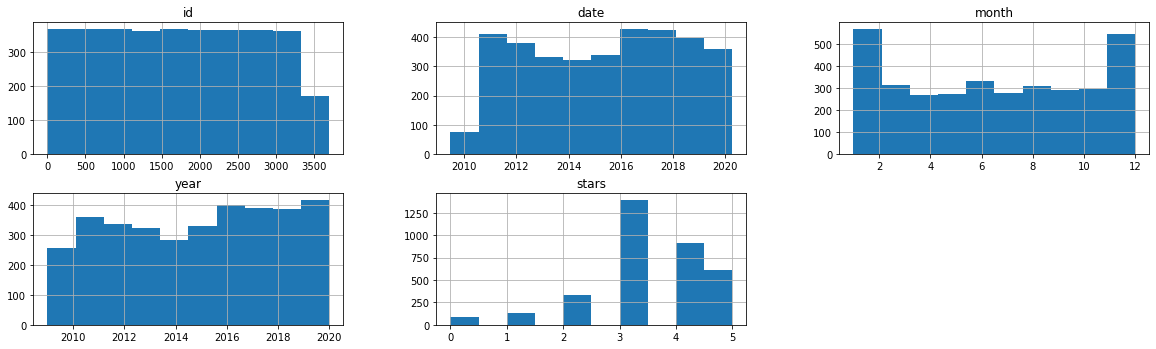

Wall time: 1.01 s


In [53]:
%%time
df.hist(figsize=(20,15), layout=(5,3))
plt.show()

In [54]:
# Split df into numerical and categorical

# Limit to categorical data using df.select_dtypes()
df_cat = df.select_dtypes(include=['object'])

# Limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])

# count number of unique numerical per column
print('numeric : \n')
print(df_num.nunique())
print('\n')
print('categoric : \n')
print(df_cat.nunique())

numeric : 

id       3473
month      12
year       12
stars       6
dtype: int64


categoric : 

url          3471
brand         473
variety      3238
style           8
rating          6
spiciness       2
region          6
country        46
dtype: int64


In [55]:
df['spiciness'].value_counts()

Non Spicy    2516
Spicy         957
Name: spiciness, dtype: int64

In [56]:
df['rating'].value_counts()

Good         1398
Very Good     915
Excellent     617
Bad           329
Very Bad      130
Horrible       84
Name: rating, dtype: int64

In [57]:
df['style'].value_counts()

Pack          1984
Bowl           671
Cup            607
Tray           156
Box             50
Restaurant       3
Bar              1
Can              1
Name: style, dtype: int64

In [58]:
df['country'].value_counts()

Japan             629
United States     429
South Korea       396
Taiwan            357
China             221
Thailand          209
Malaysia          196
Hong Kong         161
Indonesia         154
Singapore         137
Vietnam           113
United Kingdom     70
Canada             56
Philippines        52
India              41
Mexico             32
Germany            28
Australia          25
Brazil             21
Netherlands        16
Nepal              14
Myanmar            14
Bangladesh         12
Pakistan            9
Hungary             9
Colombia            6
Poland              6
France              5
Cambodia            5
Russia              5
Sarawak             5
Holland             4
Italy               4
Fiji                4
Peru                3
Sweden              3
Israel              3
Finland             3
Ukraine             3
Dubai               3
Nigeria             2
Ghana               2
Spain               2
Estonia             2
New Zealand         1
Portugal  

In [59]:
df['region'].value_counts()

Asia             2731
North America     517
Europe            161
South America      30
Australia          30
Africa              4
Name: region, dtype: int64

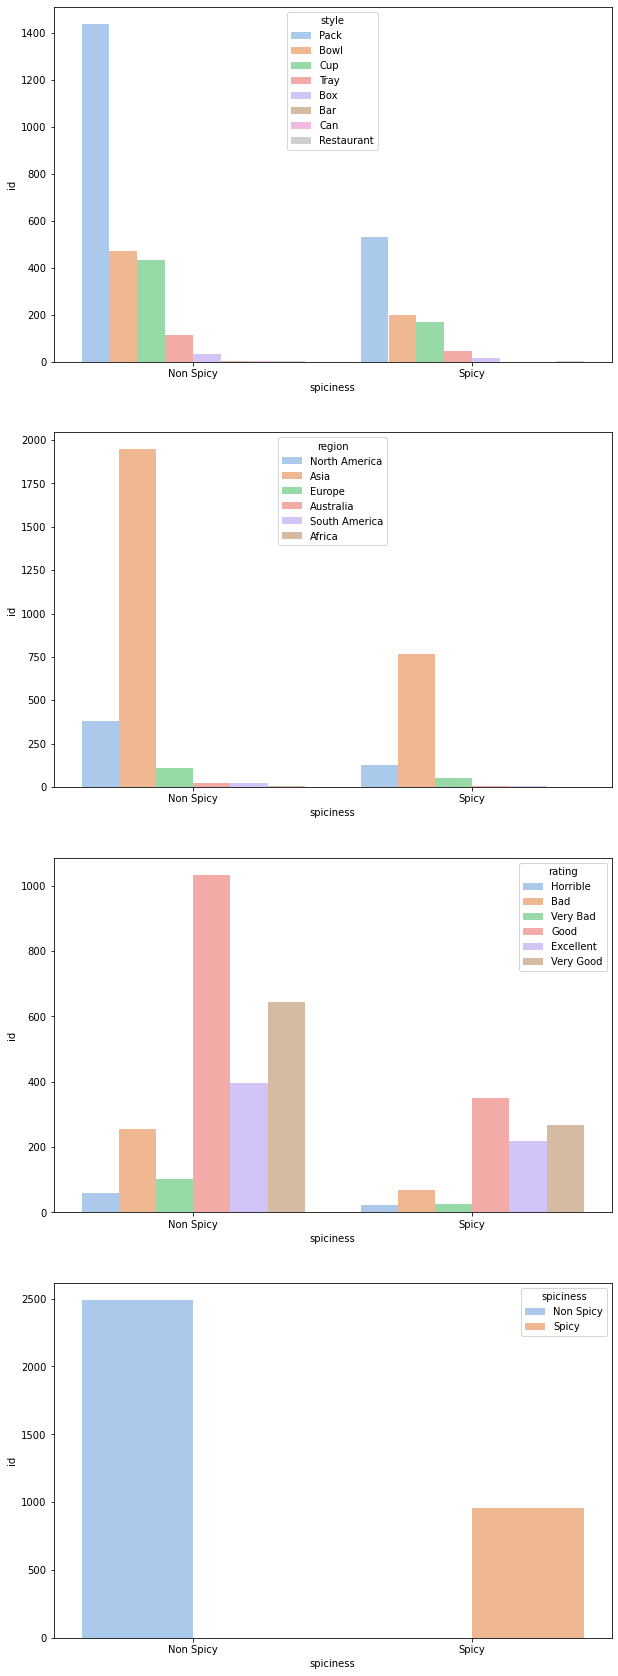

Wall time: 2.74 s


In [60]:
%%time
# Categorical variables by spiciness

feat_cat = df_cat[['style','region','rating','spiciness']][:-1]

fig ,ax = plt.subplots(4,1,figsize=(10,30))
for axi ,var in zip(ax.flat,feat_cat):
    sns.barplot(x=df_cat.spiciness,y=df_num.id.value_counts(),hue=df_cat[var],ax=axi, palette="pastel", estimator=sum)

plt.show()

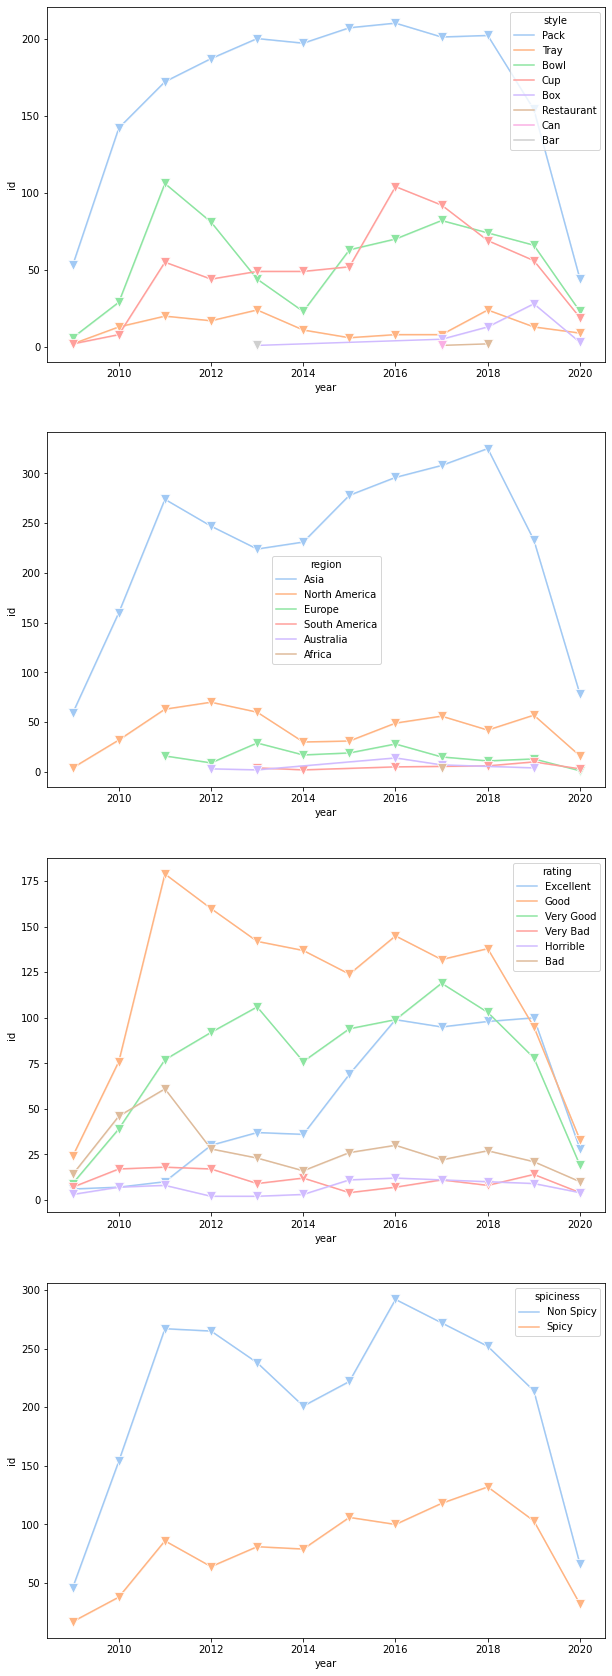

Wall time: 5.42 s


In [61]:
%%time
# Categorical variables by year

feat_cat = df_cat[['style','region','rating','spiciness']][:-1]

fig ,ax = plt.subplots(4,1,figsize=(10,30))
for axi ,var in zip(ax.flat,feat_cat):
    sns.lineplot(x=df_num.year,y=df_num.id.value_counts(),hue=df_cat[var],ax=axi, palette="pastel", marker= 'v', markersize=10, estimator=sum)

plt.show()

#### Observations

* There are a total of 3473 records of instant ramen ratings across 2009 to 2020.
* Top 3 most ratings instant ramen packaging comes in the form of Packs, followed by Bowls and Cups.
* Country of origin is in Asia and majority of the instant ramens have an overall rating of Good to Excellent (3 to 5 stars).
* There are more Non Spicy instant ramen ratings compared to Spicy ones.

##  Word Cloud Visualization

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 3472 to 193
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3473 non-null   int64         
 1   date       3473 non-null   datetime64[ns]
 2   month      3473 non-null   int64         
 3   year       3473 non-null   int64         
 4   url        3473 non-null   object        
 5   brand      3473 non-null   object        
 6   variety    3473 non-null   object        
 7   style      3473 non-null   object        
 8   stars      3473 non-null   int64         
 9   rating     3473 non-null   object        
 10  spiciness  3473 non-null   object        
 11  region     3473 non-null   object        
 12  country    3473 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 508.9+ KB


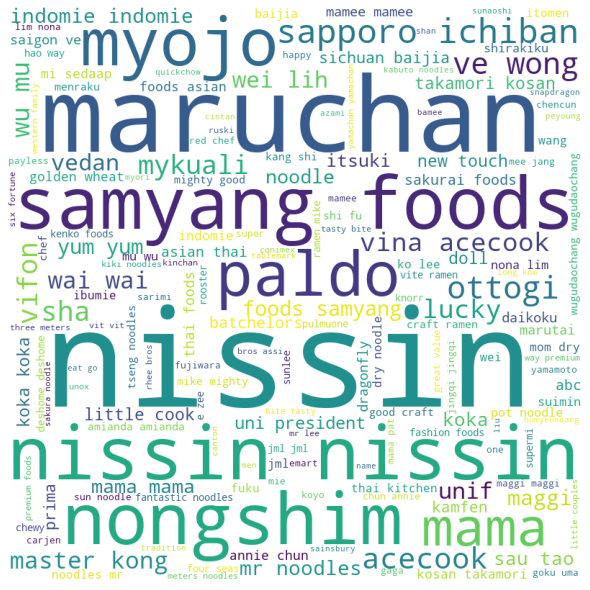

Wall time: 1.79 s


In [63]:
%%time
# Wordcloud visualization for brand

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through dataframe
for val in df.brand:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

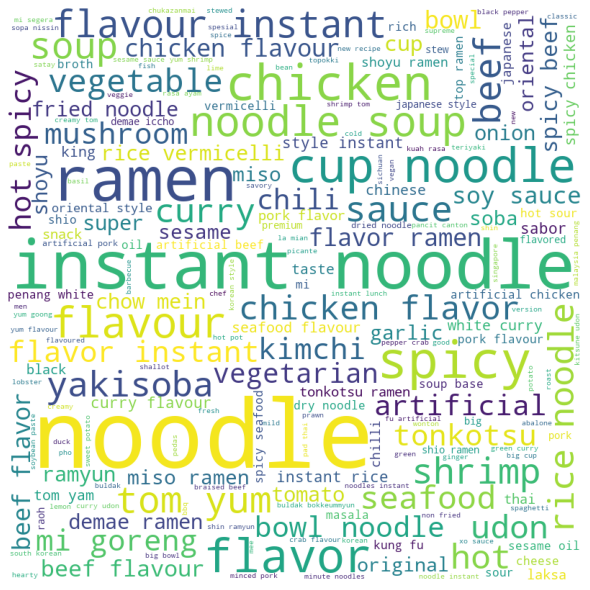

Wall time: 2.13 s


In [64]:
%%time
# Wordcloud visualization for variety

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through dataframe
for val in df.variety:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

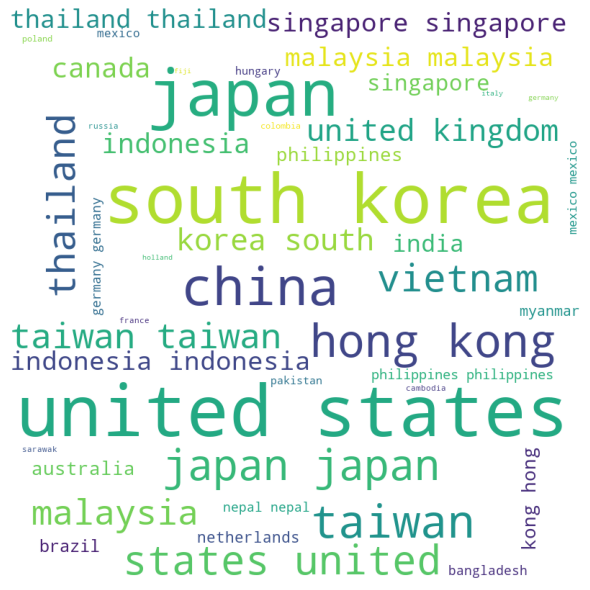

Wall time: 1.18 s


In [65]:
%%time
# Wordcloud visualization for country

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through dataframe
for val in df.country:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Observations

* Top wordcloud text reflected on instant ramen brands are Nissin, Maruchan, Samyang foods, Nongshim, Myojo and Paldo.
* Top wordcloud text reflected on instant ramen varieties are Noodle, Instant noodle, Ramen, flavor, Chicken, Spicy.
* Top wordcloud text reflected on instant ramen countries are Japan, South Korea, United States, China and Taiwan.